Dataset loaded: 569 samples, 30 features
Class distribution: Benign=357, Malignant=212

Model Performance Summary:
              Model  Accuracy  Precision  Recall
          SVM (rbf)    0.9825     0.9861  0.9861
Logistic Regression    0.9825     0.9861  0.9861
       SVM (linear)    0.9737     0.9859  0.9722
      SVM (sigmoid)    0.9298     0.9571  0.9306
         SVM (poly)    0.9123     0.8780  1.0000


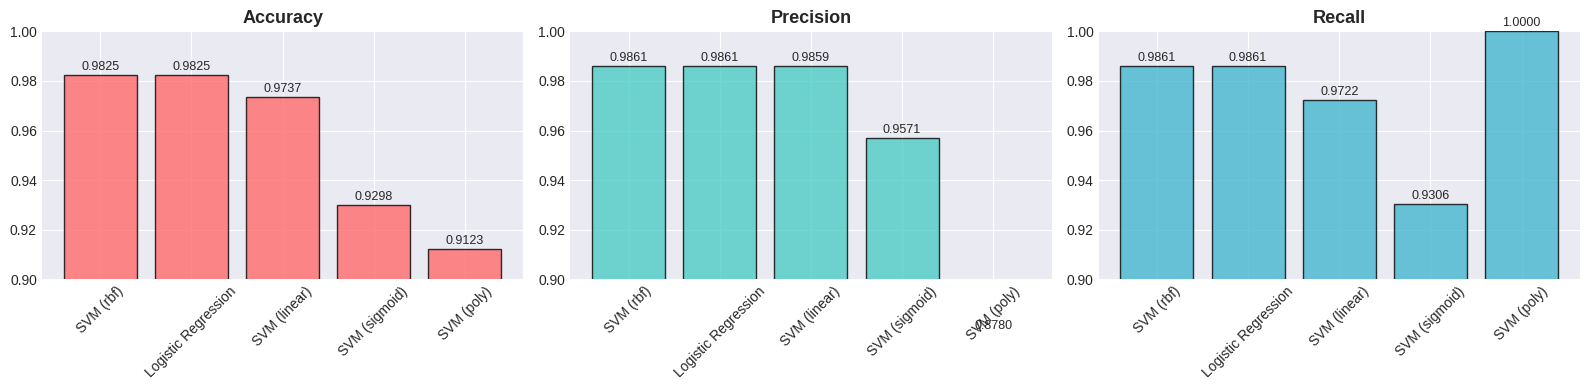

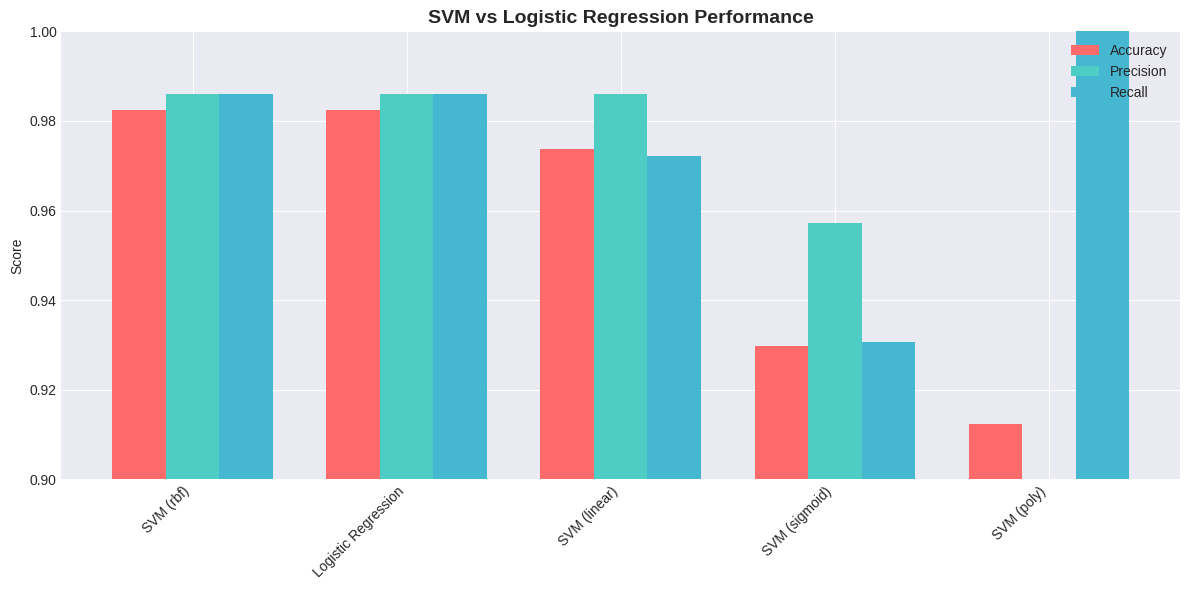


Best Performing Model: SVM (rbf)


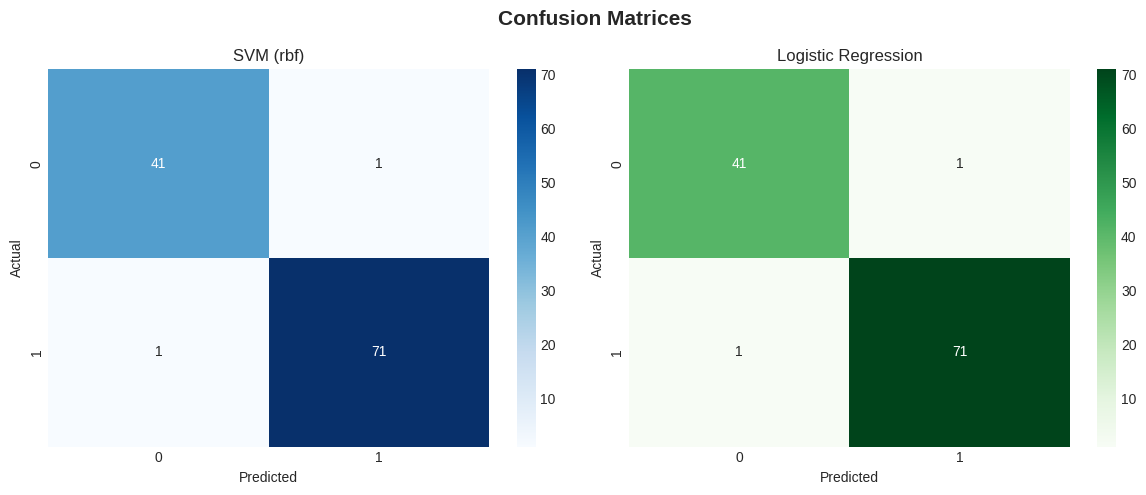

In [12]:
#Problem 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='Target')  # 0 = malignant, 1 = benign

print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Class distribution: Benign={sum(y==1)}, Malignant={sum(y==0)}")

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

# Train SVM models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for k in kernels:
    model = SVC(kernel=k, C=1.0, gamma='scale', random_state=42)
    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    results[f'SVM ({k})'] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Pred': y_pred
    }

# Logistic Regression (baseline)
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train_s, y_train)
y_pred_lr = logreg.predict(X_test_s)
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'Pred': y_pred_lr
}

# Summary table
summary = pd.DataFrame([
    {'Model': m, 'Accuracy': d['Accuracy'], 'Precision': d['Precision'], 'Recall': d['Recall']}
    for m,d in results.items()
]).sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\nModel Performance Summary:")
print(summary.round(4).to_string(index=False))

# --- Metric comparison plots ---
fig, axes = plt.subplots(1, 3, figsize=(16,4))
metrics = ['Accuracy', 'Precision', 'Recall']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i, metric in enumerate(metrics):
    axes[i].bar(summary['Model'], summary[metric], color=colors[i], alpha=0.8, edgecolor='black')
    axes[i].set_title(metric, fontsize=13, fontweight='bold')
    axes[i].set_ylim([0.9, 1.0])
    axes[i].tick_params(axis='x', rotation=45)
    for j, v in enumerate(summary[metric]):
        axes[i].text(j, v + 0.002, f"{v:.4f}", ha='center', fontsize=9)
plt.tight_layout()
plt.show()

# --- Combined bar plot ---
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(len(summary))
bar_w = 0.25
ax.bar(x - bar_w, summary['Accuracy'], bar_w, label='Accuracy', color='#FF6B6B')
ax.bar(x, summary['Precision'], bar_w, label='Precision', color='#4ECDC4')
ax.bar(x + bar_w, summary['Recall'], bar_w, label='Recall', color='#45B7D1')
ax.set_xticks(x)
ax.set_xticklabels(summary['Model'], rotation=45, ha='right')
ax.set_ylim([0.9, 1.0])
ax.set_title('SVM vs Logistic Regression Performance', fontsize=14, fontweight='bold')
ax.set_ylabel('Score')
ax.legend()
plt.tight_layout()
plt.show()

# --- Confusion Matrices ---
best_model = summary.iloc[0]['Model']
print(f"\nBest Performing Model: {best_model}")

fig, axes = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Confusion Matrices', fontsize=15, fontweight='bold')

# Best SVM confusion matrix
best_svm = [k for k in results if k.startswith('SVM') and k == best_model]
if best_svm:
    cm_svm = confusion_matrix(y_test, results[best_svm[0]]['Pred'])
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(best_svm[0])
    axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual')

# Logistic regression confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Logistic Regression')
axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


#Problem 2



Model Performance Summary:

        Model         RMSE          MAE            R2
        Ridge 1.342156e+06 9.791469e+05      0.643613
 SVR (linear) 1.389629e+06 1.000604e+06      0.617956
    SVR (rbf) 1.471674e+06 1.111258e+06      0.571512
        Lasso 2.268298e+06 1.748625e+06     -0.017926
   SVR (poly) 2.403108e+06 1.593236e+06     -0.142516
SVR (sigmoid) 2.843941e+08 1.977146e+08 -16000.357042


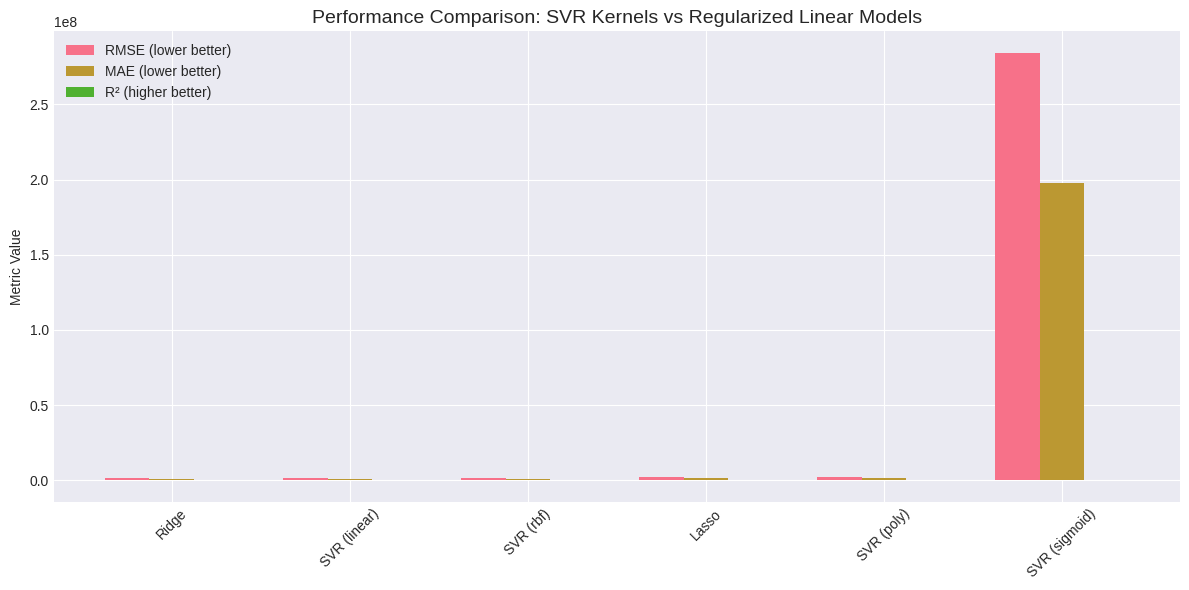

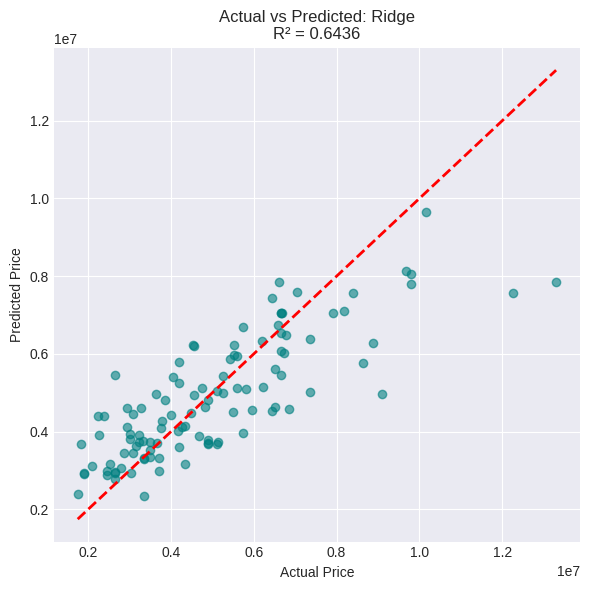

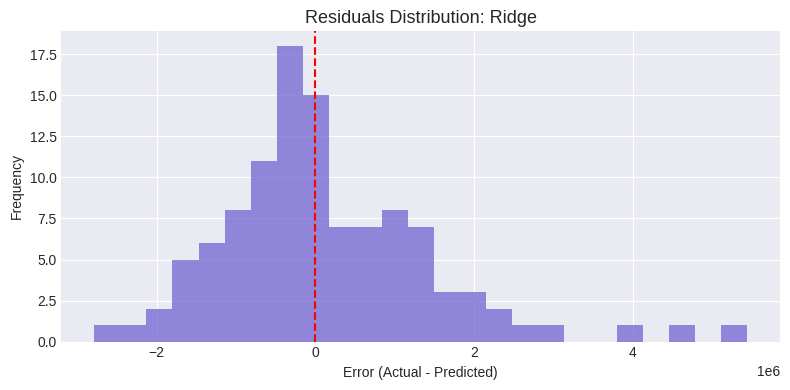

In [13]:
#Problem 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Load Data
FILENAME = 'Housing.csv'
df = pd.read_csv(FILENAME)

# Check required columns
required_cols = ['area','bedrooms','bathrooms','stories','mainroad','guestroom',
                 'basement','hotwaterheating','airconditioning','parking','prefarea','price']
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# Convert binary columns to 0/1
binary_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for c in binary_cols:
    if df[c].dtype == object:
        df[c] = df[c].str.lower().map({'yes':1, 'no':0})
    df[c] = df[c].fillna(0).astype(float)

# Features and target
X = df[['area','bedrooms','bathrooms','stories','mainroad','guestroom',
        'basement','hotwaterheating','airconditioning','parking','prefarea']].values
y = df['price'].values

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.reshape(-1,1))

X_train_s = X_scaler.transform(X_train)
X_test_s  = X_scaler.transform(X_test)
y_train_s = y_scaler.transform(y_train.reshape(-1,1)).ravel()

#Training SVR models w/ different kernals
kernels = ['linear','poly','rbf','sigmoid']
svr_results = {}

for k in kernels:
    svr = SVR(kernel=k, C=100.0, epsilon=0.1, gamma='scale')
    svr.fit(X_train_s, y_train_s)

    y_pred_s = svr.predict(X_test_s)
    y_pred = y_scaler.inverse_transform(y_pred_s.reshape(-1,1)).ravel()

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    svr_results[f'SVR ({k})'] = {'model': svr, 'pred': y_pred,
                                 'RMSE': rmse, 'MAE': mae, 'R2': r2}

#Baseline models
ridge = Ridge(alpha=1.0, random_state=42).fit(X_train_s, y_train_s)
lasso = Lasso(alpha=1.0, random_state=42, max_iter=10000).fit(X_train_s, y_train_s)

for name, model in [('Ridge', ridge), ('Lasso', lasso)]:
    y_pred_s = model.predict(X_test_s)
    y_pred = y_scaler.inverse_transform(y_pred_s.reshape(-1,1)).ravel()

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    svr_results[name] = {'model': model, 'pred': y_pred,
                         'RMSE': rmse, 'MAE': mae, 'R2': r2}

#Summary
summary = pd.DataFrame([
    {'Model': m, 'RMSE': d['RMSE'], 'MAE': d['MAE'], 'R2': d['R2']}
    for m,d in svr_results.items()
]).sort_values('R2', ascending=False).reset_index(drop=True)

print("\nModel Performance Summary:\n")
print(summary.to_string(index=False))

#Model Performance Comparison
plt.figure(figsize=(12,6))
bar_width = 0.25
x = np.arange(len(summary))

plt.bar(x - bar_width, summary['RMSE'], width=bar_width, label='RMSE (lower better)')
plt.bar(x, summary['MAE'], width=bar_width, label='MAE (lower better)')
plt.bar(x + bar_width, summary['R2'], width=bar_width, label='R² (higher better)')

plt.xticks(x, summary['Model'], rotation=45)
plt.title('Performance Comparison: SVR Kernels vs Regularized Linear Models', fontsize=14)
plt.ylabel('Metric Value')
plt.legend()
plt.tight_layout()
plt.show()

#Actual vs Predicted (Best Model)
best_model_name = summary.iloc[0]['Model']
best_pred = svr_results[best_model_name]['pred']

plt.figure(figsize=(6,6))
plt.scatter(y_test, best_pred, alpha=0.6, color='teal')
mn, mx = min(y_test.min(), best_pred.min()), max(y_test.max(), best_pred.max())
plt.plot([mn,mx],[mn,mx],'r--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted: {best_model_name}\nR² = {summary.iloc[0]["R2"]:.4f}')
plt.grid(True)
plt.tight_layout()
plt.show()

#Residual Distribution (Best Model)
residuals = y_test - best_pred
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=25, color='slateblue', alpha=0.7)
plt.axvline(0, color='r', linestyle='--')
plt.title(f'Residuals Distribution: {best_model_name}', fontsize=13)
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
